# Example 1: Umbrella Sampling in 1D

In this example, we will perform umbrella sampling along the **x-coordinate** for a particle on a 2-dimensional potential energy surface, and construct a free energy profile from the biased umbrella sampling data using WHAM.

We will use OpenMM to perform langevin dynamics simulations of a particle on a 2-dimensional potential energy surface. To learn more about OpenMM, visit https://openmm.org/

`single_particle_ld.py` contains the classes we will use to run these simulations.

In [28]:
# Imports
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

from WHAM import binless
from WHAM import binned
from WHAM.lib import potentials
from WHAM import statistics

sys.path.append('.')
import single_particle_ld

## Visualize potential

[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2


(<Figure size 900x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3d891e810>)

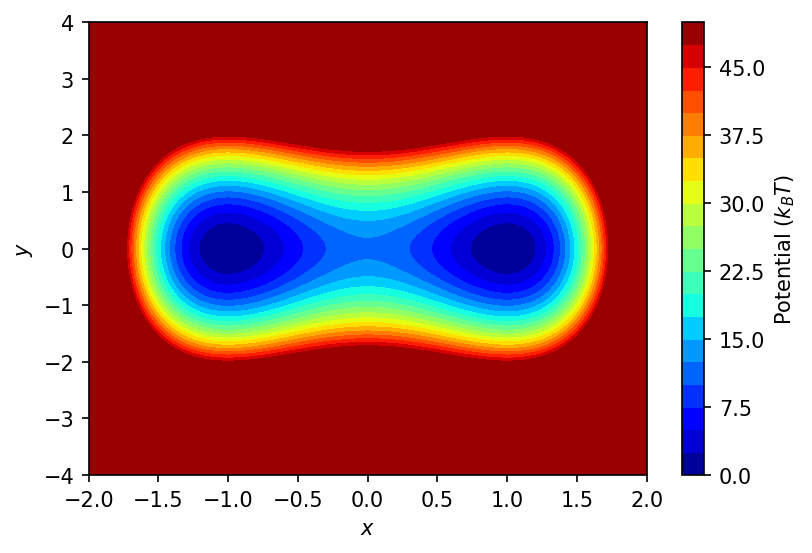

In [2]:
pot = single_particle_ld.TwoBasinPotential2D(magnitude=30)
vis = single_particle_ld.VisualizePotential2D(pot, temp=300,
                                              xrange=[-2, 2], yrange=[-4, 4],
                                              contourvals=20, clip=50)
vis.plot_potential()

## Unbiased simulation

Let's run a 500 ps unbiased simulation of a particle on this landscape:

In [3]:
if not os.path.exists("examples_out/1D_US/unbiased"):
    os.makedirs("examples_out/1D_US/unbiased")
    
pot = single_particle_ld.TwoBasinPotential2D(magnitude=30)

sim = single_particle_ld.SingleParticleSimulation(pot,
                                                  init_coord=np.array([[-1, -0, 0]]),
                                                  cpu_threads=1)
sim(nsteps=50000 + 1,
    chkevery=10000,
    trajevery=10,
    energyevery=10,
    chkfile="examples_out/1D_US/unbiased/chk_state.pkl",
    trajfile="examples_out/1D_US/unbiased/traj.dat",
    energyfile="examples_out/1D_US/unbiased/energies.dat")

t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US/unbiased/traj.dat").read_traj()

[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
Running simulation on 1 CPU threads.


 24%|████████                          | 11873/50001 [00:00<00:02, 14774.76it/s]

Checkpoint at 100.0000000 ps


 45%|███████████████▏                  | 22267/50001 [00:01<00:01, 14809.65it/s]

Checkpoint at 200.0000000 ps


 65%|██████████████████████▏           | 32644/50001 [00:02<00:01, 13740.57it/s]

Checkpoint at 300.0000000 ps


 83%|████████████████████████████▏     | 41491/50001 [00:02<00:00, 14506.09it/s]

Checkpoint at 400.0000000 ps


100%|██████████████████████████████████| 50001/50001 [00:03<00:00, 14360.16it/s]

Checkpoint at 500.0000000 ps
Checkpoint at 500.0000000 ps


### Visualize time-series

Text(0, 0.5, 'y')

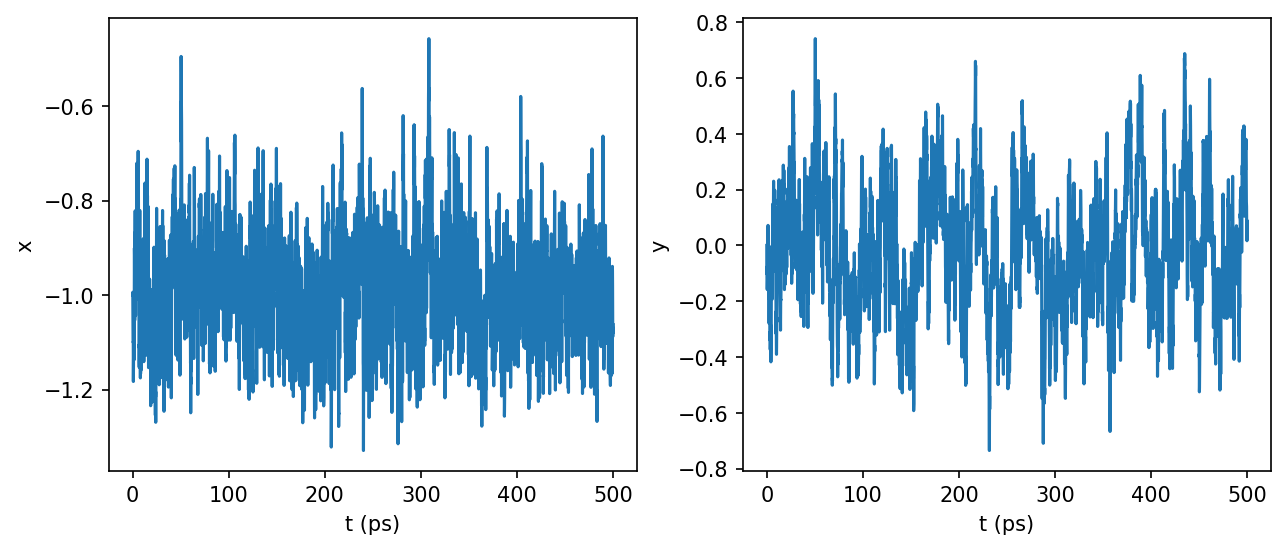

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=150)
ax[0].plot(t, traj[:, 0])
ax[1].plot(t, traj[:, 1])
ax[0].set_xlabel("t (ps)")
ax[1].set_xlabel("t (ps)")
ax[0].set_ylabel("x")
ax[1].set_ylabel("y")

### Visualize trajectory in 2D

(<Figure size 900x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3daa14310>)

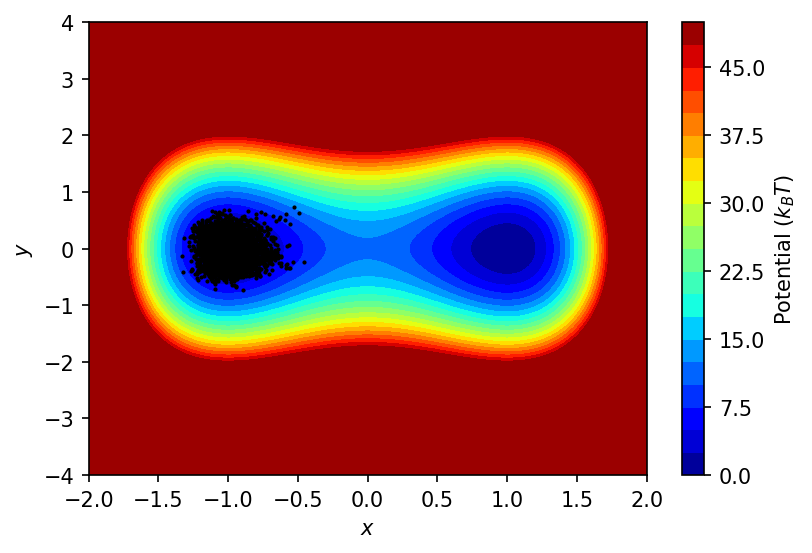

In [5]:
vis.scatter_traj(traj)

### Visualize trajectory in 1D

100%|██████████████████████████████████████| 5001/5001 [00:19<00:00, 258.86it/s]


(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3da540610>)

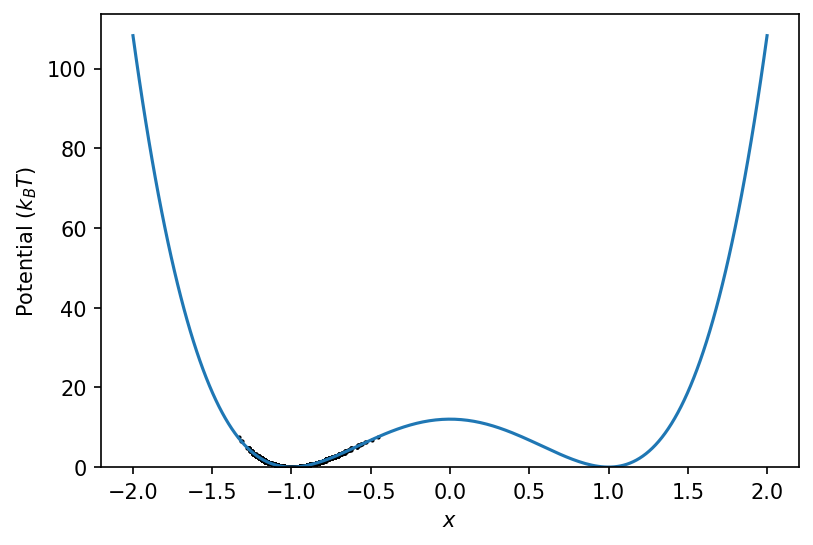

In [6]:
vis.scatter_traj_projection_x(traj)

## Biased simulation

We can localize the x-coordinate of the particle using a harmonic potential of the form $\frac{\kappa}{2} (x - x_0)^2$.

Here's an example, with $\kappa = 2$ and $x_0 = 0$.

In [7]:
if not os.path.exists("examples_out/1D_US/biased/test"):
    os.makedirs("examples_out/1D_US/biased/test")
    
pot = single_particle_ld.TwoBasinPotential2D(magnitude=30)

umbrella = single_particle_ld.HarmonicBias(kappa_x=200, x_0=0)

sim = single_particle_ld.SingleParticleSimulation(pot,
                                                  bias=umbrella,
                                                  init_coord=np.array([[-1, 0, 0]]),
                                                  cpu_threads=1)
sim(nsteps=50000 + 1,
    chkevery=10000,
    trajevery=10,
    energyevery=10,
    chkfile="examples_out/1D_US/biased/test/chk_state.pkl",
    trajfile="examples_out/1D_US/biased/test/traj.dat",
    energyfile="examples_out/1D_US/biased/test/energies.dat")

t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US/biased/test/traj.dat").read_traj()

[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - 0)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 24%|████████                          | 11920/50001 [00:00<00:02, 13990.02it/s]

Checkpoint at 100.0000000 ps


 45%|███████████████▏                  | 22360/50001 [00:01<00:01, 14841.69it/s]

Checkpoint at 200.0000000 ps


 66%|██████████████████████▎           | 32841/50001 [00:02<00:01, 14915.64it/s]

Checkpoint at 300.0000000 ps


 84%|████████████████████████████▍     | 41771/50001 [00:02<00:00, 14810.78it/s]

Checkpoint at 400.0000000 ps


100%|██████████████████████████████████| 50001/50001 [00:03<00:00, 14177.44it/s]

Checkpoint at 500.0000000 ps
Checkpoint at 500.0000000 ps


Text(0, 0.5, 'y')

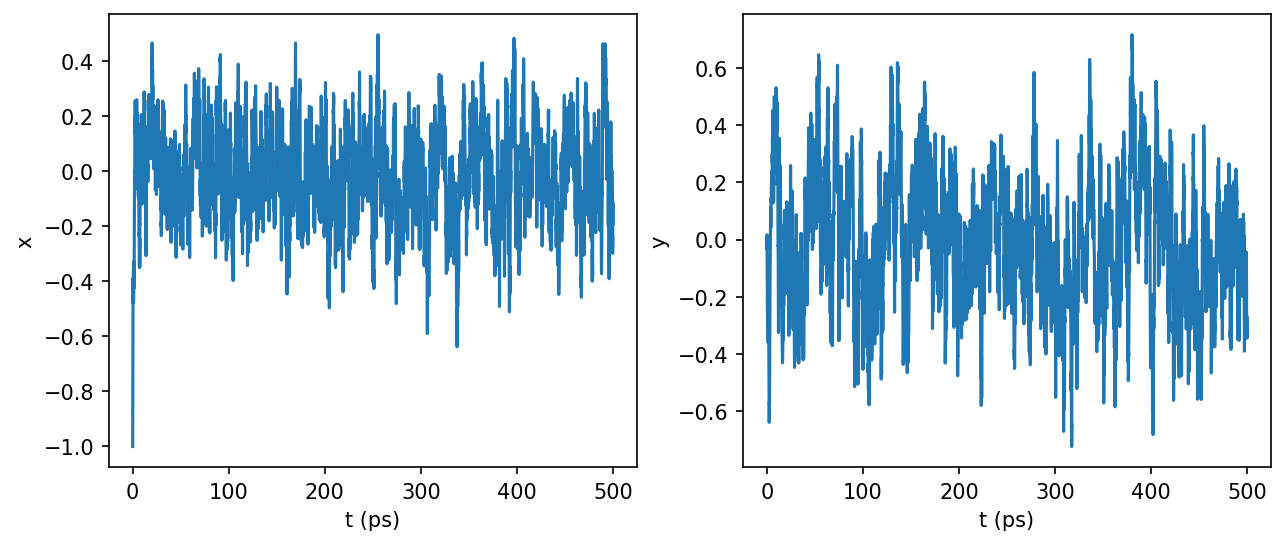

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=150)
ax[0].plot(t, traj[:, 0])
ax[1].plot(t, traj[:, 1])
ax[0].set_xlabel("t (ps)")
ax[1].set_xlabel("t (ps)")
ax[0].set_ylabel("x")
ax[1].set_ylabel("y")

As we can see, it takes some time for the system to equilibrate. Let's discard the first 200 ps (i.e. 2000 data points) and plot the rest.

(<Figure size 900x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3c09a8110>)

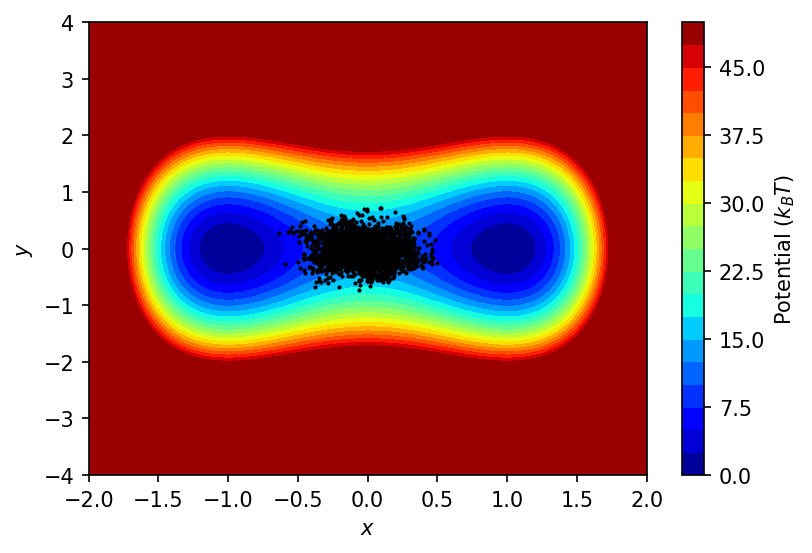

In [9]:
vis.scatter_traj(traj[2000:])

100%|██████████████████████████████████████| 3001/3001 [00:08<00:00, 372.04it/s]


(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3c08cbd10>)

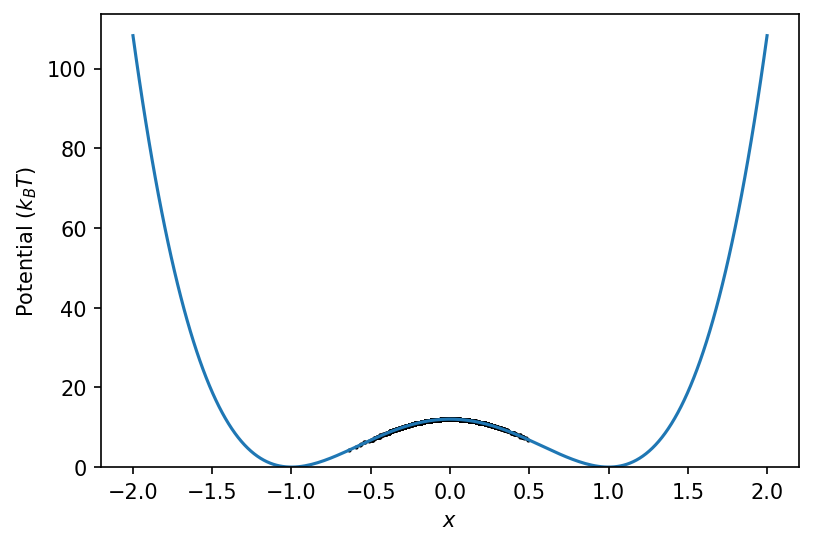

In [10]:
vis.scatter_traj_projection_x(traj[2000:])

## Umbrella sampling simulations

We can perform a series of such biased simulations with different values of $x_0$, and in the process, sample the entire landscape.

Let's set $\kappa = 200$ and $\Delta x_0 = 0.4$

In [11]:
kappa = 200
x_min = -2
x_max = 2
delta_x = 0.2
x_win = np.arange(x_min, x_max + delta_x, delta_x)

### 2 ns simulations

We'll perform these simulations for 2 ns each, so that we have enough data to construct free energy profiles.

In [12]:
for x_0 in x_win:
    if not os.path.exists("examples_out/1D_US/biased/k{}x{:.2f}".format(kappa, x_0)):
        os.makedirs("examples_out/1D_US/biased/k{}x{:.2f}".format(kappa, x_0))
    
    pot = single_particle_ld.TwoBasinPotential2D(magnitude=30)

    umbrella = single_particle_ld.HarmonicBias(kappa_x=kappa, x_0=x_0)

    sim = single_particle_ld.SingleParticleSimulation(pot,
                                                      bias=umbrella,
                                                      init_coord=np.array([[-1, 0, 0]]),
                                                      cpu_threads=1)
    sim(nsteps=200000 + 1,
        chkevery=100000,
        trajevery=10,
        energyevery=10,
        chkfile="examples_out/1D_US/biased/k{}x{:.2f}/chk_state.pkl".format(kappa, x_0),
        trajfile="examples_out/1D_US/biased/k{}x{:.2f}/traj.dat".format(kappa, x_0),
        energyfile="examples_out/1D_US/biased/k{}x{:.2f}/energies.dat".format(kappa, x_0))

[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - -2.0)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102651/200001 [00:07<00:06, 14529.03it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13856.80it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - -1.8)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101903/200001 [00:07<00:06, 14276.24it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 14254.44it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - -1.6)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101741/200001 [00:07<00:07, 12468.48it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13824.68it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - -1.4000000000000001)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102691/200001 [00:07<00:06, 14878.63it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:13<00:00, 14418.04it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - -1.2000000000000002)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102455/200001 [00:07<00:06, 14416.16it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13770.09it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - -1.0000000000000002)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101826/200001 [00:07<00:07, 12904.86it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13491.98it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - -0.8000000000000003)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 50%|████████████████▏               | 100851/200001 [00:08<00:07, 13486.51it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:15<00:00, 12788.36it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - -0.6000000000000003)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▏               | 101501/200001 [00:07<00:06, 14280.21it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13875.90it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - -0.40000000000000036)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 102084/200001 [00:07<00:07, 13183.68it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13342.12it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - -0.2000000000000004)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102431/200001 [00:07<00:06, 14724.12it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13769.15it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - -4.440892098500626e-16)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102391/200001 [00:07<00:06, 14541.31it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13568.70it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - 0.1999999999999993)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▏               | 101077/200001 [00:07<00:06, 14332.36it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13945.68it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - 0.39999999999999947)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▏               | 101541/200001 [00:07<00:07, 13854.65it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13534.79it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - 0.5999999999999996)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101623/200001 [00:07<00:06, 14657.45it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13864.84it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - 0.7999999999999994)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101620/200001 [00:07<00:06, 14203.61it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13705.48it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - 0.9999999999999991)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▏               | 101491/200001 [00:07<00:08, 11890.96it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13745.37it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - 1.1999999999999993)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102845/200001 [00:07<00:06, 14557.81it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 14224.31it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - 1.3999999999999995)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101981/200001 [00:07<00:06, 14431.24it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13854.30it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - 1.5999999999999992)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102591/200001 [00:07<00:06, 14511.52it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13965.64it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - 1.799999999999999)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▎               | 101870/200001 [00:07<00:06, 14631.72it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13799.29it/s]


Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps
[Potential] Initializing potential with expression:
30 * ((x^2 - 1)^2 + y^2) + 1000 * z^2
[Bias] Initializing bias with expression:
200 / 2 * (x - 1.9999999999999991)^2 + 0 / 2 * (y - 0)^2 + 1000 * z^2
Running simulation on 1 CPU threads.


 51%|████████████████▍               | 102662/200001 [00:08<00:06, 14088.95it/s]

Checkpoint at 1000.0000000 ps


100%|████████████████████████████████| 200001/200001 [00:14<00:00, 13356.43it/s]

Checkpoint at 2000.0000000 ps
Checkpoint at 2000.0000000 ps


### Equilibration cutoff

Let's look at timeseries data from the window furthest away from the starting configuration. We can use this to set an equilibration threshold time.

In [13]:
t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US/biased/k200x1.20/traj.dat").read_traj()

Text(0, 0.5, 'y')

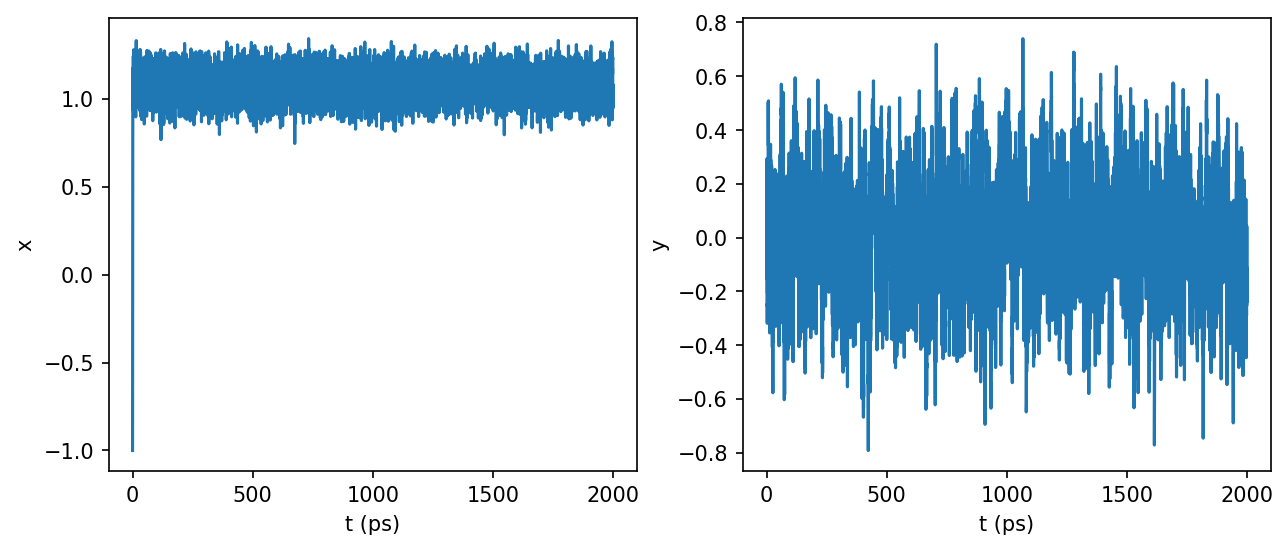

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=150)
ax[0].plot(t, traj[:, 0])
ax[1].plot(t, traj[:, 1])
ax[0].set_xlabel("t (ps)")
ax[1].set_xlabel("t (ps)")
ax[0].set_ylabel("x")
ax[1].set_ylabel("y")

Let's choose 200 ps (2000 steps) as our equilibration time

(<Figure size 900x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3c5f59b90>)

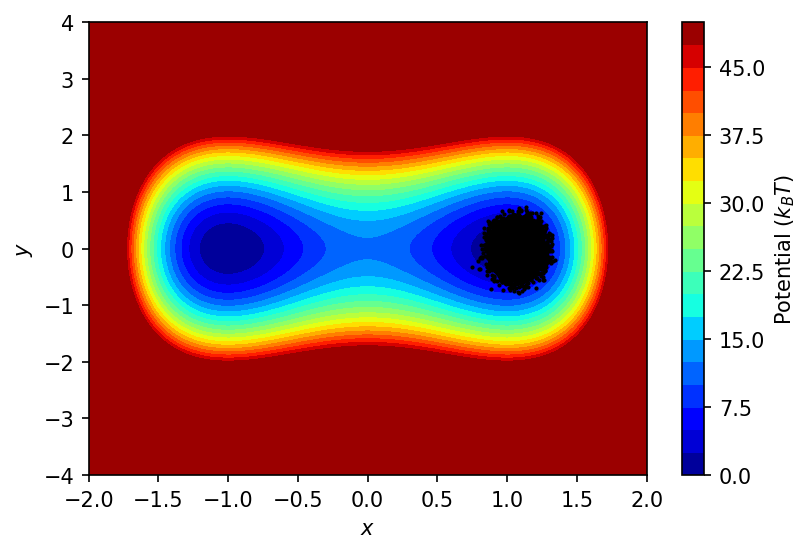

In [15]:
vis.scatter_traj(traj[2000:])

100%|██████████████████████████████████████| 1801/1801 [00:04<00:00, 427.52it/s]


(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3c5a3b990>)

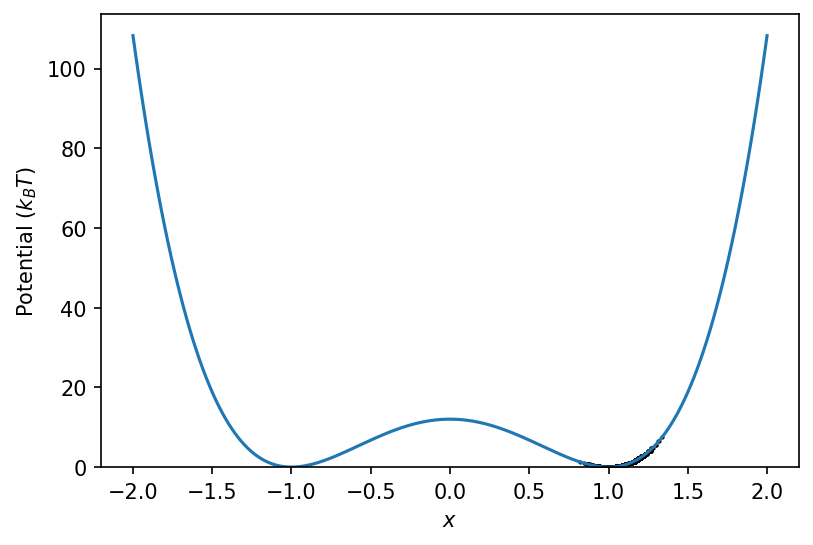

In [16]:
vis.scatter_traj_projection_x(traj[2000::10])  # only every 10, for speed

### Visualizing trajectories from all the windows

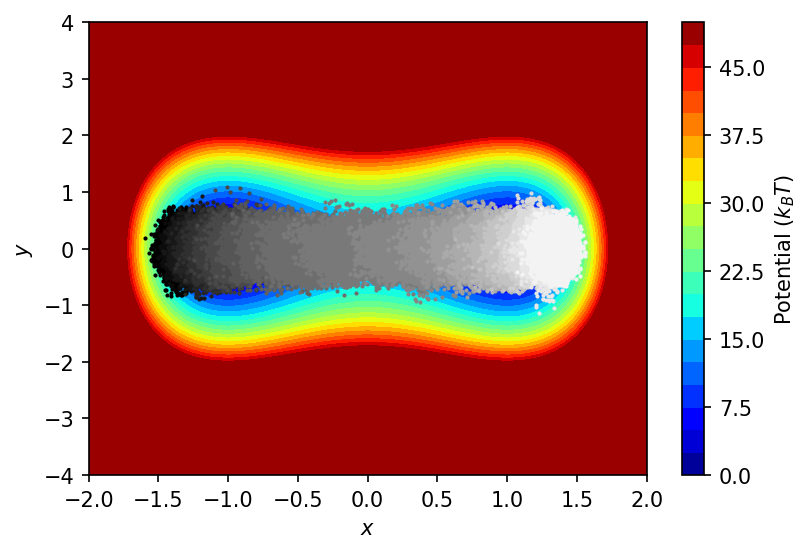

In [17]:
fig, ax = vis.plot_potential()

cm = plt.get_cmap('gist_gray')
ax.set_prop_cycle(color=[cm(1.*i/len(x_win)) for i in range(len(x_win))])

for x_0 in x_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US/biased/k{}x{:.2f}/traj.dat".format(kappa, x_0)).read_traj()
    ax.scatter(traj[2000:, 0], traj[2000:, 1], s=1)

### Visualizing histograms along $x$ coordinate

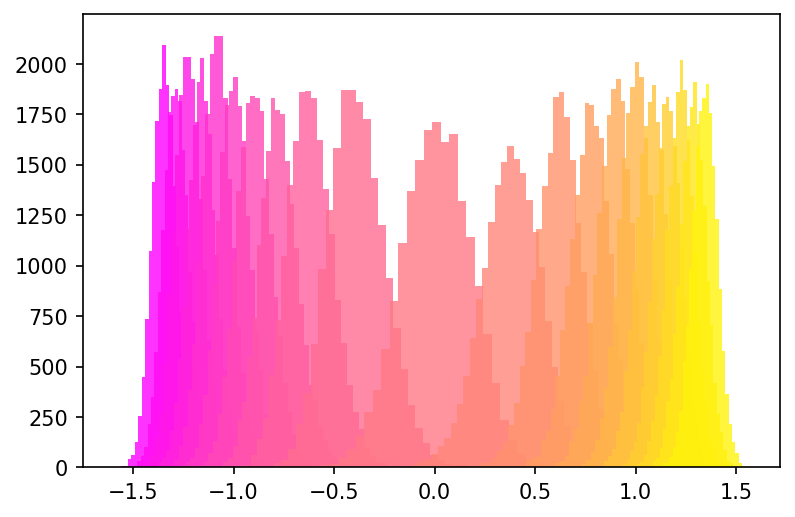

In [22]:
fig, ax = plt.subplots(dpi=150)

cm = plt.get_cmap('spring')
ax.set_prop_cycle(color=[cm(1.*i/len(x_win)) for i in range(len(x_win))])

for x_0 in x_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US/biased/k{}x{:.2f}/traj.dat".format(kappa, x_0)).read_traj()
    ax.hist(traj[2000:, 0], bins=30, alpha=0.8)

## WHAM

We'll now use binless and binned WHAM to construct free energy landscapes from the biased data we collected.

In [23]:
# Data
x_it = []
for x_0 in x_win:
    t, traj = single_particle_ld.TrajectoryReader("examples_out/1D_US/biased/k{}x{:.2f}/traj.dat".format(kappa, x_0)).read_traj()
    x_it.append(traj[2000:, 0])
    
# Umbrella potentials
u_i = []
for x_0 in x_win:
    u_i.append(potentials.harmonic(kappa, x_0))
    
# Bins for free energy profile
x_bin = np.linspace(-1.5, 1.5, 101)

# Beta
beta = 1000 / (8.3145 * 300)

### Binless WHAM

(0.0, 25.0)

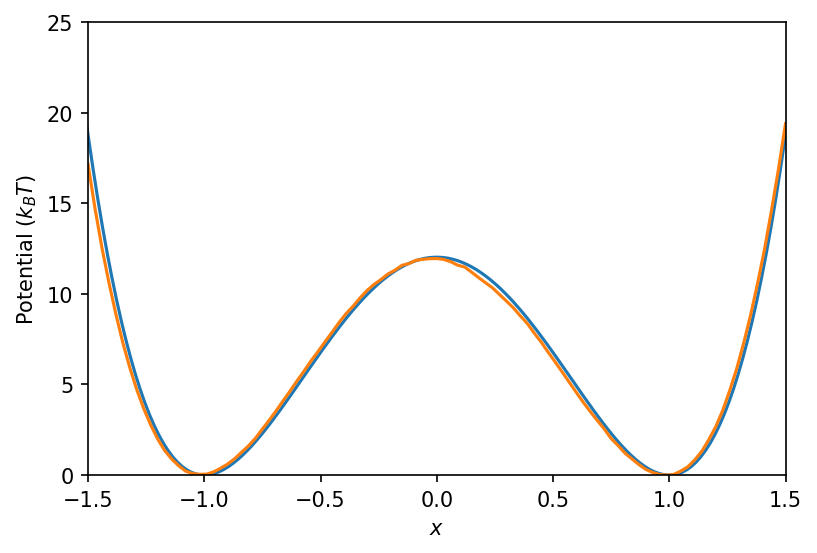

In [29]:
calc_binless = binless.Calc1D()
bF, _, _ = calc_binless.compute_betaF_profile(x_it, x_bin, u_i, beta=beta)
fig, ax, _, _ = vis.plot_projection_x() 
ax.plot(x_bin, bF - np.min(bF))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(0, 25)

### Binned WHAM

(0.0, 25.0)

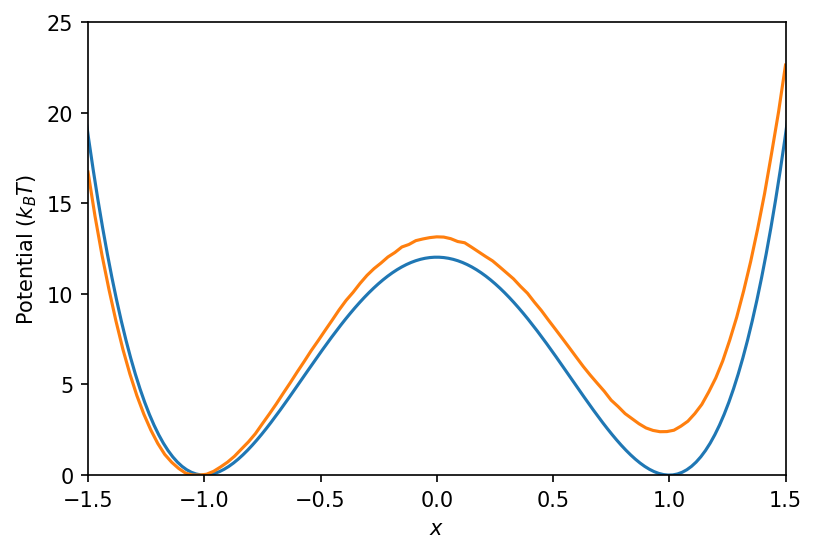

In [30]:
calc_binned = binned.Calc1D()
calc_binned.compute_betaF_profile(x_it, x_bin, u_i, beta=beta)
bF = calc.betaF_l
fig, ax, _, _ = vis.plot_projection_x()
ax.plot(x_bin, bF - np.min(bF))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(0, 25)

## How good are the WHAM results?

## Computing 2D profiles from 1D WHAM

## Reweighting to $\phi$-ensemble

In [44]:
phivals = np.arange(-10, 10, 0.01)
# binless phi-ensemble
x_avg, x_var = statistics.binless_reweight_phi_ensemble(calc_binless, phivals, beta)

# binned phi-ensemble
x_avg_bin, x_var_bin = statistics.binned_reweight_phi_ensemble(x_bin, bF, phivals, beta)

Text(0, 0.5, '$\\langle x \\rangle$')

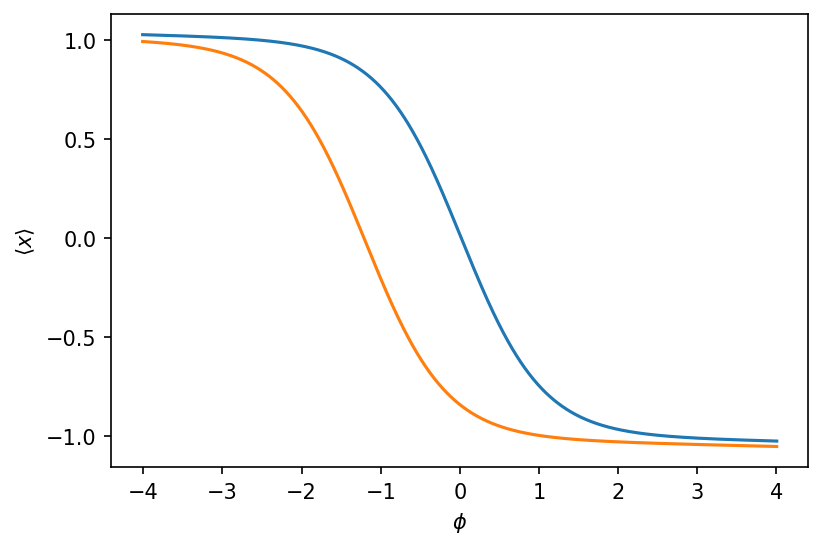

In [46]:
fig, ax = plt.subplots(dpi=150)
ax.plot(beta * phivals, x_avg, label="Binless")
ax.plot(beta * phivals, x_avg_bin, label="Binned")
ax.set_xlabel(r"$\phi$")
ax.set_ylabel(r"$\langle x \rangle$")